In [25]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV


In [26]:
# load the cleaned dataset
data_cleaned = pd.read_csv(r'data_cleaned2.csv')

In [27]:
data_cleaned.head()

,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
0,Albania,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,...,27.2,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028
1,Albania,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,...,25.8,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575
2,Albania,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,...,24.4,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895
3,Albania,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,...,22.9,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989
4,Albania,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,...,21.5,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310


In [28]:
data_cleaned["year"]

0       2000
1       2001
2       2002
3       2003
4       2004
        ... 
3355    2016
3356    2017
3357    2018
3358    2019
3359    2020
Name: year, Length: 3360, dtype: int64

In [29]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             3360 non-null   object 
 1   year                                3360 non-null   int64  
 2   clean_fuel_access_perc              3360 non-null   float64
 3   elec_access_perc                    3360 non-null   float64
 4   nat_res_depl_perc                   3360 non-null   float64
 5   forest_depl_perc                    3360 non-null   float64
 6   agri_land_perc                      3360 non-null   float64
 7   agri_forest_fish_val_perc           3360 non-null   float64
 8   co2_emissions_per_capita            3360 non-null   float64
 9   cooling_degree_days                 3360 non-null   float64
 10  energy_intensity_primary_energy     3360 non-null   float64
 11  fertility_rate                      3360 no

In [30]:
data_cleaned.head()

,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
0,Albania,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,...,27.2,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028
1,Albania,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,...,25.8,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575
2,Albania,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,...,24.4,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895
3,Albania,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,...,22.9,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989
4,Albania,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,...,21.5,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310


In [31]:
data_cleaned.columns

Index(['country', 'year', 'clean_fuel_access_perc', 'elec_access_perc',
       'nat_res_depl_perc', 'forest_depl_perc', 'agri_land_perc',
       'agri_forest_fish_val_perc', 'co2_emissions_per_capita',
       'cooling_degree_days', 'energy_intensity_primary_energy',
       'fertility_rate', 'food_prod_index', 'forest_area_perc',
       'gdp_growth_perc', 'heat_index_35', 'heating_degree_days',
       'internet_usage_perc', 'labor_force_participation_perc',
       'land_surface_temp', 'life_expectancy', 'methane_emissions_per_capita',
       'mortality_rate_under_5', 'net_migration',
       'nitrous_oxide_emissions_per_capita', 'population_65_above_perc',
       'population_density', 'female_to_male_labor_force_ratio',
       'renewable_energy_consumption_perc', 'scientific_journal_articles',
       'precipitation_evapotranspiration', 'unemployment_total_perc'],
      dtype='object')

In [ ]:
data_cleaned.set_index('year', inplace=True)
data_cleaned.sort_index(inplace=True)

# Create lagged variables for CO2 emissions per capita
data_cleaned['co2_emissions_per_capita_lag1'] = data_cleaned.groupby('country')['co2_emissions_per_capita'].shift(1)
data_cleaned['co2_emissions_per_capita_lag2'] = data_cleaned.groupby('country')['co2_emissions_per_capita'].shift(2)

# Drop rows with NaN values created by lag features
data_cleaned.dropna(inplace=True)

X = data_cleaned.drop(labels=['co2_emissions_per_capita'], axis=1)
y = data_cleaned['co2_emissions_per_capita']

In [33]:
X.shape

(3040, 32)

In [ ]:
X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit 

tss = TimeSeriesSplit(n_splits=4)

# train test split for a time series dataset
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [31]:
y_train.index


Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int64', name='year', length=2432)

In [32]:
X_train.index

Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int64', name='year', length=2432)

In [33]:
y_test.index

Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int64', name='year', length=608)

Text(0.5, 1.0, 'Mean CO2 Emissions per Capita by Year')

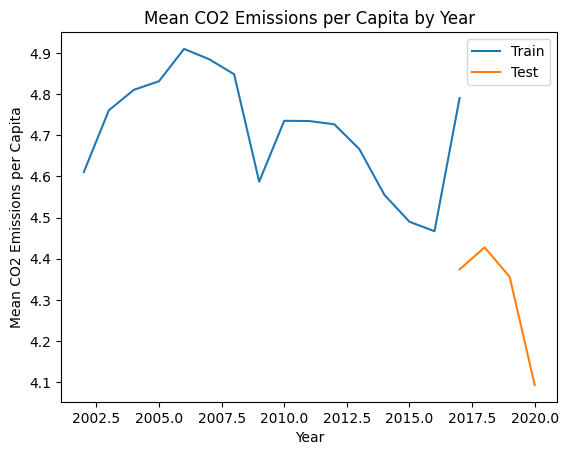

In [34]:
# Plot the mean CO2 emissions per capita by year for train and test sets
y_train.groupby('year').mean().plot(label='Train', legend=True)
y_test.groupby('year').mean().plot(label='Test', legend=True)

plt.xlabel('Year')
plt.ylabel('Mean CO2 Emissions per Capita')
plt.title('Mean CO2 Emissions per Capita by Year')

***

## Feature selection with cross-validation

Having a high ratio of features to data points has the following disadvantages:
* Not all features are expected to have an important influence when predicting the CO2 emissions.
* Some features are correlated among each other and therefore partially duplicate their influence on the DV (multicollinearity of the variables). Having additional correlated features gives no additional information gain when learning the training set and is for some machine learning algorithms not allowed.
* Sometimes a too many variables means too many degrees of freedom for the algorithm, leading to overfitting on the training set and therefore reducing prediction generalization/precision on newly unseen data.
    
This is why it is necessary to conduct feature selection, in other words - to decide which features would be most suitable for the current predictive challenge. For the purpose of better prediction generalization on new data, the features are selected by evaluating a Random Forest model for different combinationf of features involved, simultaneously using cross-validation.

The feature ranking class sklearn.feature_selection.RFECV used here incorporates recursive feature elimination and cross-validated selections. Once fitted to the training data, it ranks the models with the different features by the R2 score and returns this rank. Consequently, only the most relevant features are kept for the further analysis for both the training and testing dataset (variables features_train_reduced and features_test_reduced).

In [35]:
# Create dummy variables for each country
X_train.drop(labels='country', axis=1, inplace=True)

/var/folders/r2/8t4lt6m50fs6052zj19gbf1r0000gn/T/ipykernel_31959/1862233461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(labels='country', axis=1, inplace=True)


In [19]:
X_train.head()

,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,cooling_degree_days,energy_intensity_primary_energy,fertility_rate,food_prod_index,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Viet Nam,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2002,2.8,33.120686,0.397783,0.397783,60.595065,15.846504,4459.70,5.19,4.125,65.54000,...,False,False,False,False,False,False,False,False,False,False
2002,11.3,29.653931,4.579793,1.346549,55.813973,37.662742,6117.73,4.28,5.248,91.12104,...,False,False,False,False,False,False,False,False,False,False
2002,100.0,100.000000,0.117126,0.115519,42.379454,2.722891,599.85,3.37,1.460,95.66000,...,False,False,False,False,False,False,False,False,False,False
2002,3.2,9.917558,0.027445,0.000000,37.869152,26.372448,6815.83,5.08,6.339,53.28000,...,False,False,False,False,False,False,False,False,False,False
2002,97.3,99.800000,6.723990,0.000000,24.531489,3.847046,4592.82,8.11,2.739,95.71000,...,False,False,False,False,False,True,False,False,False,False


In [36]:
# Set folds for cross-validation for the feature selection
random_state_num = 42
# nr.seed() is used to set the random seed for the random number generator
# By setting the seed, you ensure that the sequence of random numbers generated is the same each time the code is executed.
nr.seed(1) 
feature_folds = KFold(n_splits=4, shuffle=True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an object for a model for recursive feature elimination with CV
nr.seed(1)
selector = RFECV(estimator=rf_selector, cv=feature_folds, scoring='r2', n_jobs=-1)

# Fit the selector to the training data
selector = selector.fit(X_train, np.ravel(y_train))

# Print the feature ranking
print("Feature ranking after RFECV:")
print(selector.ranking_)

# Print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i, j in zip(X_test, ranks_transform) if j == 1] # Selects the features with a ranking of 1 (most important features)
print("Chosen important features:")
print(chosen_features)

# create a DataFrame with the selected features
selected_features_df = X_train[chosen_features]

Feature ranking after RFECV:
[17 18  1  9  1  1 12  1  5 10  1  1 16  8  4  1 15  1  1  1 13  6  3  2
  7 11  1 14  1  1  1]
Chosen important features:
['elec_access_perc', 'forest_depl_perc', 'agri_land_perc', 'cooling_degree_days', 'food_prod_index', 'forest_area_perc', 'internet_usage_perc', 'land_surface_temp', 'life_expectancy', 'methane_emissions_per_capita', 'renewable_energy_consumption_perc', 'precipitation_evapotranspiration', 'unemployment_total_perc', 'co2_emissions_per_capita_lag1']


Features:

old: ['nat_res_depl_perc', 'agri_land_perc', 'agri_forest_fish_val_perc', 'energy_intensity_primary_energy', 'forest_area_perc', 'gdp_growth_perc', 'labor_force_participation_perc', 'life_expectancy', 'methane_emissions_per_capita', 'mortality_rate_under_5', 'scientific_journal_articles', 'unemployment_total_perc', 'co2_emissions_per_capita_lag1', 'co2_emissions_per_capita_lag2']

['elec_access_perc', 'forest_depl_perc', 'agri_land_perc', 'cooling_degree_days', 'food_prod_index', 'forest_area_perc', 'internet_usage_perc', 'land_surface_temp', 'life_expectancy', 'methane_emissions_per_capita', 'renewable_energy_consumption_perc', 'precipitation_evapotranspiration', 'unemployment_total_perc', 'co2_emissions_per_capita_lag1']


<table> <tr> <td> <b>Variable name</b> </td> <td> <b>Description</b> </td> <td> <b>Unit</b> </td> </tr> <tr> <td> nat_res_depl_perc </td> <td> Adjusted savings: natural resources depletion </td> <td> % of GNI </td> </tr> <tr> <td> agri_land_perc </td> <td> Agricultural land </td> <td> % of land area </td> </tr> <tr> <td> agri_forest_fish_val_perc </td> <td> Agriculture, forestry, and fishing, value added </td> <td> % of GDP </td> </tr> <tr> <td> energy_intensity_primary_energy </td> <td> Energy intensity level of primary energy </td> <td> MJ/$2017 PPP GDP </td> </tr> <tr> <td> forest_area_perc </td> <td> Forest area </td> <td> % of land area </td> </tr> <tr> <td> gdp_growth_perc </td> <td> GDP growth </td> <td> annual % </td> </tr> <tr> <td> labor_force_participation_perc </td> <td> Labor force participation rate, total </td> <td> % of total population ages 15-64 </td> </tr> <tr> <td> life_expectancy </td> <td> Life expectancy at birth, total </td> <td> years </td> </tr> <tr> <td> methane_emissions_per_capita </td> <td> Methane emissions </td> <td> metric tons of CO2 equivalent per capita </td> </tr> <tr> <td> mortality_rate_under_5 </td> <td> Mortality rate, under-5 </td> <td> per 1,000 live births </td> </tr> <tr> <td> scientific_journal_articles </td> <td> Scientific and technical journal articles </td> <td> </td> </tr> <tr> <td> unemployment_total_perc </td> <td> Unemployment, total </td> <td> % of total labor force </td> </tr> <tr> <td> co2_emissions_per_capita_lag1 </td> <td> CO2 emissions per capita (lag 1) </td> <td> metric tons per capita (lag 1) </td> </tr> <tr> <td> co2_emissions_per_capita_lag2 </td> <td> CO2 emissions per capita (lag 2) </td> <td> metric tons per capita (lag 2) </td> </tr> </table>


In [44]:
X_train.head()



,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,cooling_degree_days,energy_intensity_primary_energy,fertility_rate,food_prod_index,...,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc,co2_emissions_per_capita_lag1,co2_emissions_per_capita_lag2
year,,,,,,,,,,,,,,,,,,,,,
2002,2.8,33.120686,0.397783,0.397783,60.595065,15.846504,4459.70,5.19,4.125,65.54000,...,0.166158,3.749267,314.279608,83.171226,79.08,6.03,-0.785759,11.059,0.188035,0.176227
2002,11.3,29.653931,4.579793,1.346549,55.813973,37.662742,6117.73,4.28,5.248,91.12104,...,0.911334,2.437654,11.603669,40.362547,76.76,71.94,-1.440975,14.747,0.232118,0.216388
2002,100.0,100.000000,0.117126,0.115519,42.379454,2.722891,599.85,3.37,1.460,95.66000,...,0.357175,16.749770,113.875749,76.412641,18.28,4058.67,0.641944,4.500,5.923502,5.992401
2002,3.2,9.917558,0.027445,0.000000,37.869152,26.372448,6815.83,5.08,6.339,53.28000,...,0.488140,2.855504,46.170574,76.520344,85.43,71.81,-2.026153,2.910,0.083612,0.088272
2002,97.3,99.800000,6.723990,0.000000,24.531489,3.847046,4592.82,8.11,2.739,95.71000,...,0.486368,4.897160,28.718246,59.615121,12.84,1052.92,-1.389384,16.170,5.458171,5.383910


In [45]:
selected_features_df.head()

,elec_access_perc,forest_depl_perc,agri_land_perc,cooling_degree_days,food_prod_index,forest_area_perc,internet_usage_perc,land_surface_temp,life_expectancy,methane_emissions_per_capita,renewable_energy_consumption_perc,precipitation_evapotranspiration,unemployment_total_perc,co2_emissions_per_capita_lag1
year,,,,,,,,,,,,,,
2002,33.120686,0.397783,60.595065,4459.70,65.54000,13.795210,0.893433,30.563746,58.855000,0.517548,79.08,-0.785759,11.059,0.188035
2002,29.653931,1.346549,55.813973,6117.73,91.12104,12.051415,0.439478,40.062110,58.976000,1.668946,76.76,-1.440975,14.747,0.232118
2002,100.000000,0.115519,42.379454,599.85,95.66000,35.794536,19.370000,22.718591,77.065854,1.214487,18.28,0.641944,4.500,5.923502
2002,9.917558,0.000000,37.869152,6815.83,53.28000,26.010599,0.200993,36.687455,51.272000,0.664994,85.43,-2.026153,2.910,0.083612
2002,99.800000,0.000000,24.531489,4592.82,95.71000,55.350377,4.910446,28.311697,72.662000,8.785213,12.84,-1.389384,16.170,5.458171


In [46]:
print(chosen_features)

['elec_access_perc', 'forest_depl_perc', 'agri_land_perc', 'cooling_degree_days', 'food_prod_index', 'forest_area_perc', 'internet_usage_perc', 'land_surface_temp', 'life_expectancy', 'methane_emissions_per_capita', 'renewable_energy_consumption_perc', 'precipitation_evapotranspiration', 'unemployment_total_perc', 'co2_emissions_per_capita_lag1', 'country_id']


In [47]:
# assign only the important variables to the features array of both training and testing dataset
# features_train_reduced = selector.transform(X_train)
# features_test_reduced = selector.transform(X_test)

chosen_features.remove('country_id')

features_train_reduced = X_train[chosen_features]
features_test_reduced = X_test[chosen_features]

print("Training subset shape before the recursive feature elimination:")
print(X_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(2432, 31)
Training subset array shape after the recursive feature elimination:
(2432, 14)
Test subset array shape after the recursive feature elimination:
(608, 14)


In [48]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [49]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [50]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(y_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

best number of estimators:
1400
best max_features:
sqrt
max_depth:
60
min_samples_split
5
min_samples_leaf
1


In [51]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [52]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, y_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.992
Standard deviation of the R2 score over all folds = 0.002
R2 score for each fold:
Fold  1    0.991
Fold  2    0.992
Fold  3    0.993
Fold  4    0.992
Fold  5    0.991
Fold  6    0.996
Fold  7    0.991
Fold  8    0.993
Fold  9    0.990
Fold 10    0.995


In [92]:
test_chosen_features = chosen_features.copy()
test_chosen_features.insert(0, 'country')

test_example = data_cleaned[test_chosen_features]

denmark_df = test_example[test_example['country'] == 'Denmark']

denmark_df.reset_index(inplace=True)

denmark_df_2020 = denmark_df[denmark_df['year'] == 2018]
denmark_df_2020.head()

denmark_df_2020.drop(labels=['country', 'year'], axis=1, inplace=True)

denmark_df_2020.head()

/var/folders/r2/8t4lt6m50fs6052zj19gbf1r0000gn/T/ipykernel_31959/1868782909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denmark_df_2020.drop(labels=['country', 'year'], axis=1, inplace=True)


,elec_access_perc,forest_depl_perc,agri_land_perc,cooling_degree_days,food_prod_index,forest_area_perc,internet_usage_perc,land_surface_temp,life_expectancy,methane_emissions_per_capita,renewable_energy_consumption_perc,precipitation_evapotranspiration,unemployment_total_perc,co2_emissions_per_capita_lag1
16,100.0,0.008027,65.8125,155.38,92.87,15.664,97.319204,13.969207,80.953659,1.399255,34.56,-2.280466,5.13,5.756134


In [93]:
rf_best_model.predict(denmark_df_2020)

array([6.32022429])

In [95]:
filtered_data = data_cleaned.copy()
filtered_data.reset_index(inplace=True)
filtered_data = filtered_data[(filtered_data['country'] == 'Denmark') & (filtered_data['year'] == 2018)]
co2_emissions_per_capita = filtered_data['co2_emissions_per_capita']
print(co2_emissions_per_capita)


2636    5.718913
Name: co2_emissions_per_capita, dtype: float64


In [55]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=y_test, y_pred=predictions)
mse = mean_squared_error(y_true=y_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.980440802245607
Mean Squared Error: MSE=
0.48447389889618664
Root Mean Squared Error: RMSE=
0.6960415927918292


Summary
R² = 0.9804: The model explains 98.04% of the variance in the dependent variable, indicating a very good fit.

MSE = 0.4845: The average squared difference between the actual and predicted values is 0.4845.

RMSE = 0.6960: The average magnitude of the prediction errors is 0.6960 units of the dependent variable.

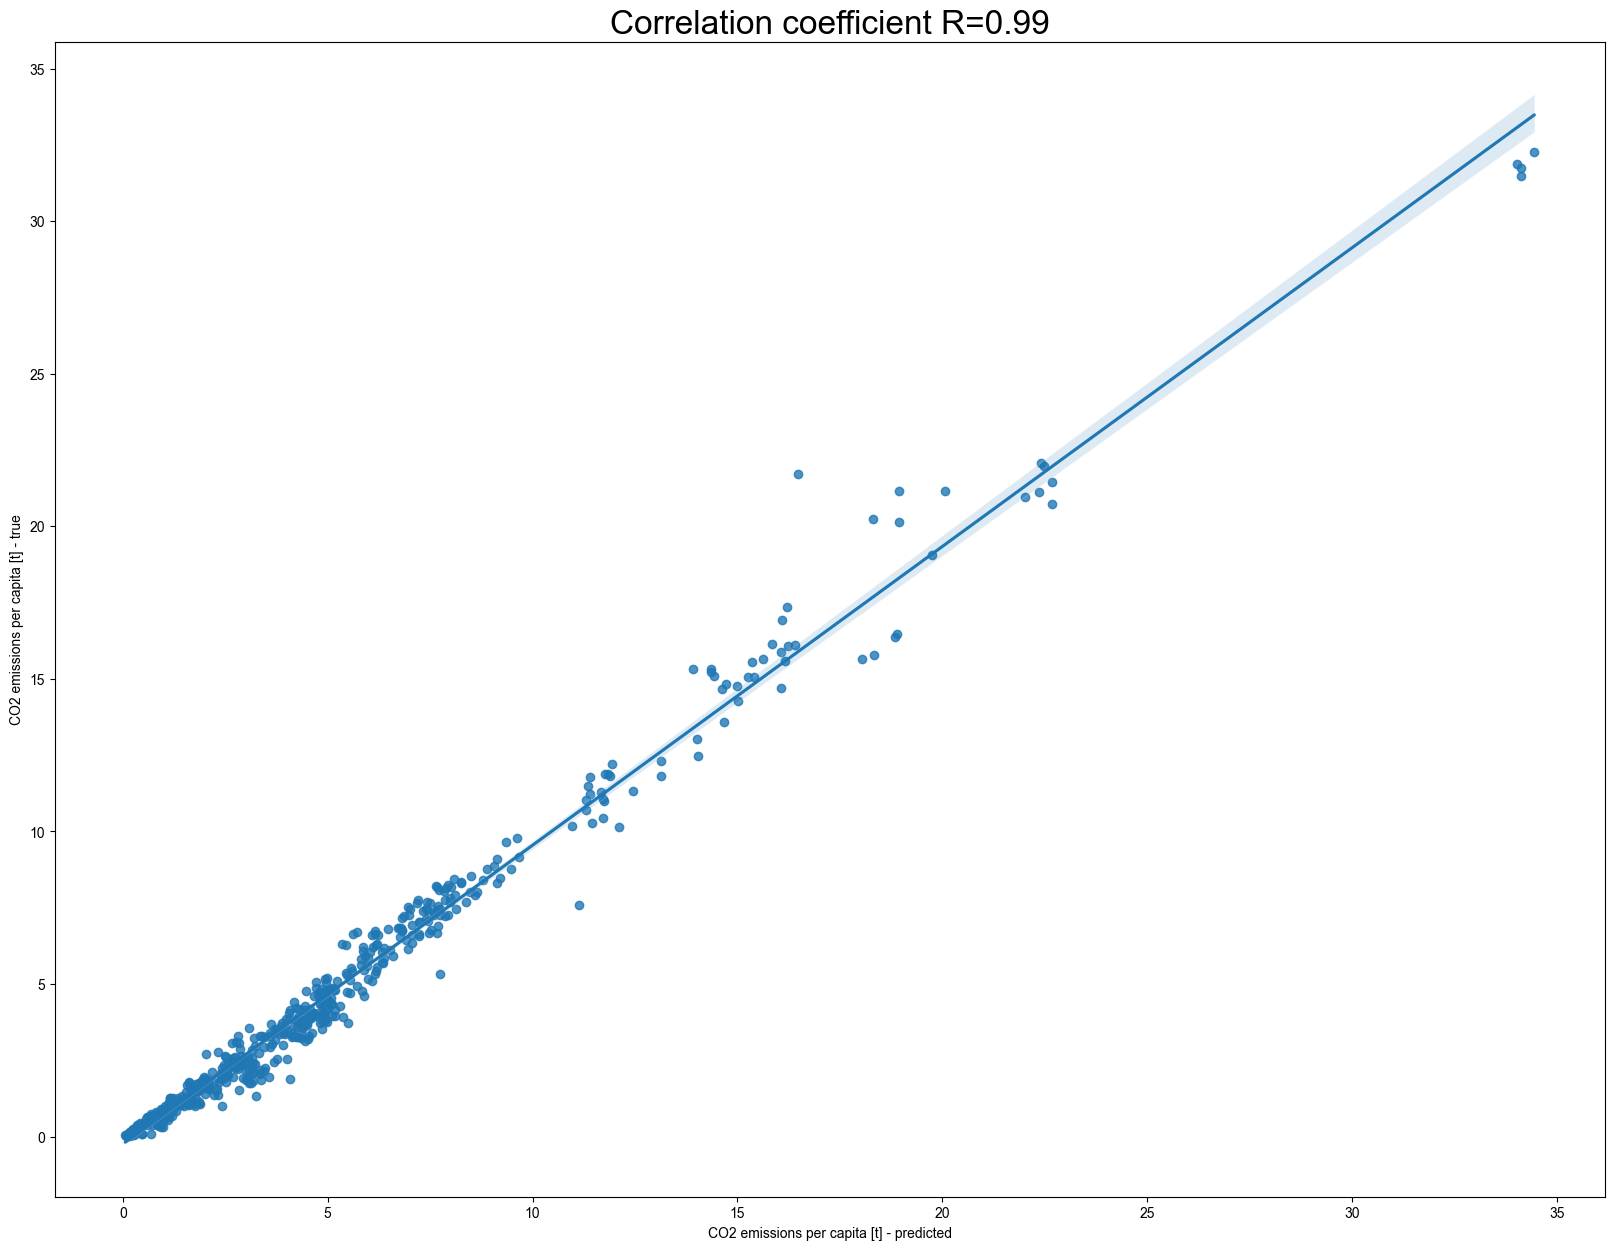

In [56]:
# Ensure y_test is a 1-dimensional array
y_test = np.array(y_test).flatten()
predictions = np.array(predictions).flatten()

# Plot predicted vs true values of the test subset
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=y_test, fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R=" + str(round(np.corrcoef(predictions, y_test)[0, 1], 2)))
plt.show()

some points are off -> not every row has a Data Leakage 

TO-DO: Feature Importance, permuation feature importance (shuffle features and check)

What is better/ worse? Overestimating or underestimating 

In [44]:


# Assuming rf_best_model is the trained RandomForest model and features used during training are known
# Define future dates
last_known_year = 2020  # Replace with the actual last year in your dataset
future_years = pd.date_range(start=f'{last_known_year + 1}-01-01', periods=5, freq='Y')

# Assuming 'chosen_features' contains the selected feature list used in training
# and 'features_test_reduced' contains the last known row of data as a reference
# Initialize future features DataFrame
future_features = pd.DataFrame(index=future_years)

# Use last known feature values as the base for prediction
last_row = features_test_reduced.iloc[-1].copy()
for col in last_row.index:
    future_features[col] = last_row[col]

# Update CO2 lag features based on the last known values in y_test
y_test_series = pd.Series(y_test)  # Assuming y_test is a NumPy array or Series
future_features['co2_emissions_per_capita_lag1'] = y_test_series.iloc[-1]
future_features['co2_emissions_per_capita_lag2'] = y_test_series.shift(1).iloc[-1]

print("Future features:", future_features)

# Predict CO2 emissions for the next 5 years
future_predictions = rf_best_model.predict(future_features[chosen_features])

# Prepare future forecast series
future_forecast = pd.Series(future_predictions, index=future_years)

# Display the predictions
print("Future CO2 Emissions per Capita Predictions:")
print(future_forecast)


/var/folders/r2/8t4lt6m50fs6052zj19gbf1r0000gn/T/ipykernel_2002/3277271593.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=f'{last_known_year + 1}-01-01', periods=5, freq='Y')


Future CO2 Emissions per Capita Predictions:
2021-12-31    0.647106
2022-12-31    0.647106
2023-12-31    0.647106
2024-12-31    0.647106
2025-12-31    0.647106
Freq: YE-DEC, dtype: float64


In [28]:
# features_test_reduced.reset_index(inplace=True)

In [29]:
features_test_reduced

,nat_res_depl_perc,agri_land_perc,agri_forest_fish_val_perc,energy_intensity_primary_energy,forest_area_perc,gdp_growth_perc,labor_force_participation_perc,life_expectancy,methane_emissions_per_capita,mortality_rate_under_5,scientific_journal_articles,unemployment_total_perc,co2_emissions_per_capita_lag1,co2_emissions_per_capita_lag2,country_id
year,,,,,,,,,,,,,,,
2017,0.000000,65.818182,2.792911,3.50,13.834800,0.903028,52.157,79.654000,0.534000,9.0,1528.73,10.168,4.434700,4.222074,83
2017,11.241381,10.397436,0.290595,8.33,0.820513,4.290950,73.498,79.689000,11.463930,7.3,237.99,1.192,21.495310,22.385625,8
2017,4.086927,22.507650,9.329259,3.18,51.097761,2.368387,70.977,76.972000,1.692737,14.4,1586.96,3.840,2.420481,2.555603,44
2017,0.079092,29.759704,1.431974,2.66,6.469501,4.276596,73.669,82.551220,1.067907,3.8,12322.35,4.140,7.633162,7.913354,71
2017,0.278074,44.419190,26.961066,1.56,1.039832,-5.071796,33.164,65.957000,0.322704,60.3,122.36,18.504,0.342802,0.475240,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.212690,19.178439,7.554892,3.76,61.486989,-15.306894,64.236,75.931707,1.260630,2.5,309.32,17.880,4.181645,4.018308,98
2020,5.480119,72.358944,12.965656,6.64,9.099658,-4.557752,64.128,72.141000,5.512313,15.4,209.71,6.590,7.160836,6.809659,97
2020,0.004433,68.865061,9.366692,5.08,11.753222,-8.275978,71.645,70.166000,1.247453,14.5,271.60,1.210,3.348667,3.160421,96


In [ ]:
# features_train_reduced = X_train[chosen_features]
# features_test_reduced = X_test[chosen_features]

# Predict CO2 emissions for future years (e.g., next 5 years)
X_test.index = pd.to_datetime(X_test.index)
last_known_year = X_test.index[-1].year

future_years = pd.date_range(start=pd.to_datetime(f'{last_known_year + 1}-01-01'), periods=5, freq='Y')

# Convert y_test to a Series if it's currently a NumPy array
y_test = pd.Series(y_test, name='co2_emissions_per_capita')

# Create a DataFrame for future features
future_features = pd.DataFrame(index=future_years)
future_features['country_id'] = features_test_reduced['country_id'].iloc[-1]  # Assuming the last known country
future_features['co2_emissions_per_capita_lag1'] = y_test.iloc[-1]  # Last known CO2 emissions
future_features['co2_emissions_per_capita_lag2'] = y_test.shift(1).iloc[-1]  # Second last known CO2 emissions

# Predict future CO2 emissions
future_predictions = rf_best_model.predict(future_features)

# Create a Series for future predictions
future_forecast = pd.Series(future_predictions, index=future_years)

# Print future predictions
print("Future CO2 Emissions per Capita Predictions:")
print(future_forecast)

/var/folders/r2/8t4lt6m50fs6052zj19gbf1r0000gn/T/ipykernel_67144/4073403541.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=pd.to_datetime(f'{last_known_year + 1}-01-01'), periods=5, freq='Y')


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- agri_forest_fish_val_perc
- agri_land_perc
- energy_intensity_primary_energy
- forest_area_perc
- gdp_growth_perc
- ...
